# Set Variables

In [1]:
output_version = 1

# -------- dataset
# software_name = "Camel"
# software_name = "CloudStack"
# software_name = "Geode"
software_name = "Hbase"

In [2]:
dataset_file_names = {
    "Camel":      "Camel_DE - v.02",
    "CloudStack": "CloudStack_DE - v.01",
    "Geode":      "Geode_DE - v.01",
    "Hbase":      "Hbase_DE - v.01"
}

dataset_file_name = dataset_file_names[software_name]

# Google Colab

In [3]:
# Libs
!pip install enlighten
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
!ls "/content/gdrive/My Drive/"

Mounted at /content/gdrive
'Colab Notebooks'   SAVE


In [5]:
# project folder path
project_folder = "gdrive/MyDrive/Colab Notebooks/paper/"

# data folder path
data_folder =    "00- My Data/one-phased method/"

# output folder path
output_folder =  "01- Jupyter Notebook/one-phased method _ Cosine Similarity/00. Output/"

In [6]:
# dataset folder path
dataset_folder = software_name + "/"

# output data-folder path
output_data_folder = project_folder + output_folder + dataset_folder + dataset_file_name + "/"

# Libs

In [7]:
import json
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from operator import truediv

from matplotlib.ticker import MaxNLocator

# Config

In [8]:
mypaths = {
    "data": {
        "dataset": project_folder + data_folder + dataset_folder + dataset_file_name + ".csv"
    },
    "output": {
        "performance": output_data_folder + "performances/CS-performance-v{}.json".format(output_version)
    }
}

preprocessing_params = {
    "data":{
        "dataset": {
            "columns_name":   ["text", "bug_class_2"],
            "columns_dtype" : {0: "str", 1: "int64"},
            "bug_classes": [0, 1],
            "num_bug_classes": 2
        }
    }
}

In [9]:
bcd_colours = ["blue", "green", "red"]

# Read File

In [10]:
result_path = mypaths["output"]["performance"]
with open(result_path) as filehandle:
    whole_data = json.load(filehandle)

In [11]:
# bug_classes
class_labels = whole_data["preprocessing_params"]["data"]["dataset"]["bug_classes"]

# confusion_matrix
cf_matrix = whole_data["model_results"]["confusion_matrix"]
cf_matrix = np.array(cf_matrix)

# CalculateMetrics

In [12]:
class CalculateMetrics():
    def __init__(self, cm):
        self.cm = cm # it is a numpy object
        self.true_positives = np.diag(cm)
    
    
    # calculate precision for each class
    def calc_precision(self):
        columns_sum = np.sum(self.cm, axis=0)
        prec = list(map(truediv, self.true_positives, columns_sum))
        self.precision = prec
        return prec
    
    
    # calculate recall for each class
    # recall = accuracy per class
    # how accuratly each class is predicted
    def calc_recall(self):
        rows_sum = np.sum(self.cm, axis=1)
        rec = list(map(truediv, self.true_positives, rows_sum))
        self.recall = rec
        return rec
    
    
    # calculate f1_score for each class
    def calc_f1_score(self):
        tempPrec = np.array(self.precision)
        tempRec = np.array(self.recall)
        numerator = tempPrec * tempRec
        Denominator = tempPrec + tempRec
        f1s = 2 * (numerator / Denominator)
        self.f1_score = f1s
        return f1s
    
    def calc_accuracy(self):
        total_samples = np.sum(self.cm)
        sum_true_positives = sum(self.true_positives)
        acc = (sum_true_positives / total_samples)
        return acc

## obj

In [13]:
calcmet = CalculateMetrics(cf_matrix)
precision = calcmet.calc_precision()
precision = [round(elem * 100) for elem in precision]

recall = calcmet.calc_recall()
recall = [round(elem * 100) for elem in recall]

f1_score = calcmet.calc_f1_score()
f1_score = [round(elem * 100) for elem in f1_score]

acc = calcmet.calc_accuracy()
acc = round(acc * 100)

# plot_confusion_matrices

In [14]:
def plot_confusion_matrices():
    
    fig_cf, axes_cd = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
    fig_cf.suptitle("Seaborn Confusion Matrix with labels")
    fig_cf.supxlabel("--Predicted-- Bug Report Category")
    fig_cf.supylabel("--Actual-- Bug Report Category")
    
    datasetNames = ["validation", "train"]
    
    mycbar = True
    snax = sns.heatmap(cf_matrix / np.sum(cf_matrix), 
                        annot=True, fmt=".2%", cmap="Blues", ax=axes_cd, vmin=0, vmax=1, 
                        cbar=mycbar, annot_kws={"size": 12})
    
    
    snax.set_title("[Cosine Similarity]\n")
    
    labels = list(map(str, class_labels))
    
    snax.xaxis.set_ticklabels(labels)
    snax.yaxis.set_ticklabels(labels)
    
    fig_cf.tight_layout(w_pad=6.0)

# results

In [15]:
print("-" * 15)
print("precision          :", precision)
print("recall             :", recall)
print("f1_score           :", f1_score)
print("accuracy           :", acc)

---------------
precision          : [70, 40]
recall             : [70, 40]
f1_score           : [70, 40]
accuracy           : 60


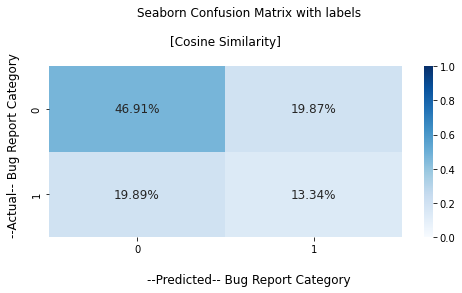

In [16]:
plot_confusion_matrices()